In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sklearn
from sklearn.model_selection import train_test_split


dataset= pd.read_csv("Amazon - Movies and TV Ratings.csv")  # read the dataset in using pandas
dataset.head()


,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


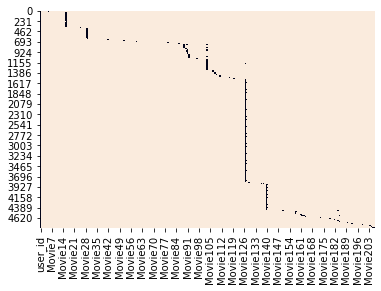

In [3]:
#Checking null values in the column by data visualization. 
sns.heatmap(dataset.isnull(),cbar=False)


In [75]:
# to see how many rows and coloumns are present 
dataset.shape

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
4843    5.0
4844    5.0
4845    5.0
4846    5.0
4847    5.0
Name: Movie1, Length: 4848, dtype: float64

In [23]:
#to check the number of null values in the dataset
dataset.isnull().sum()

user_id        0
Movie1      4847
Movie2      4847
Movie3      4847
Movie4      4846
            ... 
Movie202    4842
Movie203    4847
Movie204    4840
Movie205    4813
Movie206    4835
Length: 207, dtype: int64

In [8]:
# basic undersstanding of a data
dataset.describe()

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
count,1.0,1.0,1.0,2.0,29.000000,1.0,1.0,1.0,1.0,1.0,...,5.000000,2.0,1.0,8.000000,3.000000,6.000000,1.0,8.000000,35.000000,13.000000
mean,5.0,5.0,2.0,5.0,4.103448,4.0,5.0,5.0,5.0,5.0,...,3.800000,5.0,5.0,4.625000,4.333333,4.333333,3.0,4.375000,4.628571,4.923077
std,NaN,NaN,NaN,0.0,1.496301,NaN,NaN,NaN,NaN,NaN,...,1.643168,0.0,NaN,0.517549,1.154701,1.632993,NaN,1.407886,0.910259,0.277350
min,5.0,5.0,2.0,5.0,1.000000,4.0,5.0,5.0,5.0,5.0,...,1.000000,5.0,5.0,4.000000,3.000000,1.000000,3.0,1.000000,1.000000,4.000000
25%,5.0,5.0,2.0,5.0,4.000000,4.0,5.0,5.0,5.0,5.0,...,4.000000,5.0,5.0,4.000000,4.000000,5.000000,3.0,4.750000,5.000000,5.000000
50%,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,4.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000
75%,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,5.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000
max,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,5.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000


In [73]:
#Dealing with NaN values
#dataset = dataset.replace(to_replace=np.nan, value=dataset.mode())[0]
mean = dataset.mean()
dataset = dataset.fillna(mean)
dataset.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,2.0,5.0,4.103448,4.0,5.0,5.0,5.0,...,3.8,5.0,5.0,4.625,4.333333,4.333333,3.0,4.375,4.628571,4.923077
1,AH3QC2PC1VTGP,5.0,5.0,2.0,5.0,4.103448,4.0,5.0,5.0,5.0,...,3.8,5.0,5.0,4.625,4.333333,4.333333,3.0,4.375,4.628571,4.923077
2,A3LKP6WPMP9UKX,5.0,5.0,2.0,5.0,4.103448,4.0,5.0,5.0,5.0,...,3.8,5.0,5.0,4.625,4.333333,4.333333,3.0,4.375,4.628571,4.923077
3,AVIY68KEPQ5ZD,5.0,5.0,2.0,5.0,4.103448,4.0,5.0,5.0,5.0,...,3.8,5.0,5.0,4.625,4.333333,4.333333,3.0,4.375,4.628571,4.923077
4,A1CV1WROP5KTTW,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,...,3.8,5.0,5.0,4.625,4.333333,4.333333,3.0,4.375,4.628571,4.923077


In [71]:
# changing dataset format
final=dataset.melt(id_vars='user_id', var_name='Movie_names', value_name='Ratings')
final.head(20)

,user_id,Movie_names,Ratings
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,5.0
2,A3LKP6WPMP9UKX,Movie1,5.0
3,AVIY68KEPQ5ZD,Movie1,5.0
4,A1CV1WROP5KTTW,Movie1,5.0
5,AP57WZ2X4G0AA,Movie1,5.0
6,A3NMBJ2LCRCATT,Movie1,5.0
7,A5Y15SAOMX6XA,Movie1,5.0
8,A3P671HJ32TCSF,Movie1,5.0
9,A3VCKTRD24BG7K,Movie1,5.0


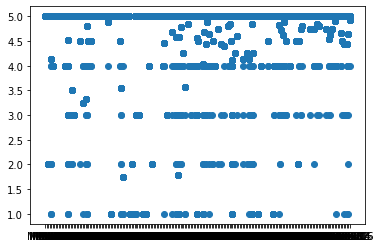

In [13]:
# Data visualization(Movie_names Vs Ratings)
plt.scatter(final['Movie_names'],final['Ratings'])

In [72]:
#Sorting Movie names and Ratings, Hiding null values
final.groupby('Movie_names')['Ratings'].mean().sort_values(ascending=False).head(5)
df=pd.DataFrame(final.groupby('Movie_names')['Ratings'].mean())
df.head()

,Ratings
Movie_names,
Movie1,5.0
Movie10,5.0
Movie100,4.0
Movie101,5.0
Movie102,4.0


In [25]:
final.groupby('Movie_names')['Ratings'].count().sort_values(ascending=False).head(5)
df['count']=pd.DataFrame(final.groupby('Movie_names')['Ratings'].count())
df.head()

,Ratings,count
Movie_names,,
Movie1,5.0,4848
Movie10,5.0,4848
Movie100,4.0,4848
Movie101,5.0,4848
Movie102,4.0,4848


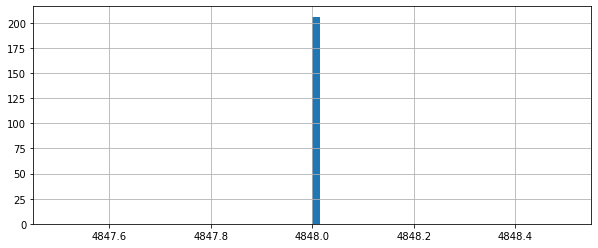

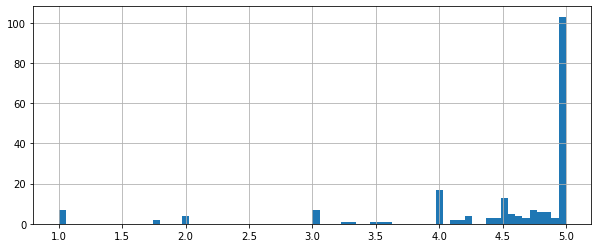

In [19]:
# visualization of Ratings and count using histograms
plt.figure(figsize=(10,4))
df['count'].hist(bins=70)
plt.figure(figsize=(10,4))
df['Ratings'].hist(bins=70)

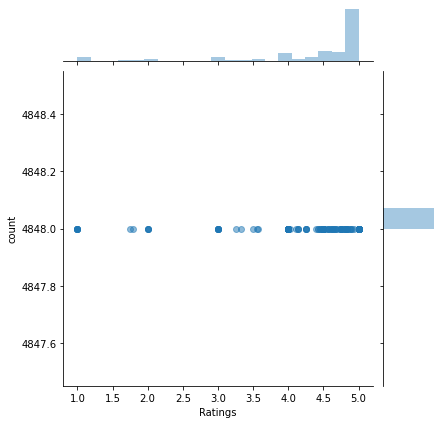

In [20]:
sns.jointplot(x='Ratings', y='count', data=ratings,alpha=0.5)

# Defining x and y for spliting the dataset


In [53]:
X=df['count']
y=df['Ratings']

In [54]:
X

Movie_names
Movie1      4848
Movie10     4848
Movie100    4848
Movie101    4848
Movie102    4848
            ... 
Movie95     4848
Movie96     4848
Movie97     4848
Movie98     4848
Movie99     4848
Name: count, Length: 206, dtype: int64

In [55]:
y

Movie_names
Movie1      5.000000
Movie10     5.000000
Movie100    4.000000
Movie101    5.000000
Movie102    4.000000
              ...   
Movie95     3.333333
Movie96     5.000000
Movie97     4.800000
Movie98     5.000000
Movie99     4.000000
Name: Ratings, Length: 206, dtype: float64

In [56]:
ratings.shape

(206, 2)

# Splitting the dataset

In [57]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [59]:
# calculating the length of train data
len(X_train)

164

In [60]:
# calculating the length of the data
len(X_test)

42

In [61]:
# Making predictions using scikit learn
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
from numpy import array

# Create an instance and fit the model 
lr_model = LinearRegression()
X_train= array(X_train)
y_train= array(y_train)
lr_model.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression()

In [62]:
print(lr_model.intercept_)

[4848.]


In [63]:
print(lr_model.coef_)

[[0.]]


In [64]:
# Returns a NumPy Array
# Predict for One Observation 
y_pred=lr_model.predict(X_test)

In [65]:
array_1d = y_test.flatten()
array_1d

array([4848, 4848, 4848, 4848, 4848, 4848, 4848, 4848, 4848, 4848, 4848,
       4848, 4848, 4848, 4848, 4848, 4848, 4848, 4848, 4848, 4848, 4848,
       4848, 4848, 4848, 4848, 4848, 4848, 4848, 4848, 4848, 4848, 4848,
       4848, 4848, 4848, 4848, 4848, 4848, 4848, 4848, 4848], dtype=int64)

In [66]:
array_2d = y_pred.flatten()
array_2d

array([4848., 4848., 4848., 4848., 4848., 4848., 4848., 4848., 4848.,
       4848., 4848., 4848., 4848., 4848., 4848., 4848., 4848., 4848.,
       4848., 4848., 4848., 4848., 4848., 4848., 4848., 4848., 4848.,
       4848., 4848., 4848., 4848., 4848., 4848., 4848., 4848., 4848.,
       4848., 4848., 4848., 4848., 4848., 4848.])

In [67]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [52]:
data = pd.DataFrame({'Actual': array_1d, 'Predicted': array_2d})
data

,Actual,Predicted
0,4848,4848.0
1,4848,4848.0
2,4848,4848.0
3,4848,4848.0
4,4848,4848.0
5,4848,4848.0
6,4848,4848.0
7,4848,4848.0
8,4848,4848.0
9,4848,4848.0
